In [79]:
# GIVEN PARAMS

averages = {
    2022:140,
    2023:135
}

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('dark_background')

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as plt
import pandas as pd
from datetime import datetime, timedelta
from datapipeline import DataFeed
from dateutil.relativedelta import relativedelta
from datetime import timedelta, datetime

%matplotlib inline

In [ ]:
current_month = datetime.now().month
current_year = datetime.now().year

In [3]:
self = DataFeed()

In [27]:
df = self.get_food_price_index
ser = df['Food Price Index']

In [28]:
# cleanup for dummy forecasts added to the real data
ser = ser[:-5]

In [53]:
def get_seasonality_monthly(ser, periods_back = 60):
    
    if len(ser)>periods_back:
        ser = ser[-periods_back:]
    
    model = seasonal_decompose(x=ser,extrapolate_trend='freq',period=12)
    seasonal = model.seasonal
    seasonal = seasonal.loc[ser.loc[f'{self.year-1}'].index]
    return {i.month:seasonal.loc[i] for i in seasonal.index}

In [56]:
seasonal = get_seasonality_monthly(ser)

In [57]:
seasonal

{1: 0.41134655049888985,
 2: 0.8480161224970932,
 3: 3.3452983943318477,
 4: 2.0956002897486163,
 5: 1.9889957092852701,
 6: -0.10832352344323615,
 7: -4.3017294260398655,
 8: -0.9741571538000056,
 9: -1.4775785707165492,
 10: -0.9313321811428561,
 11: -0.13003194835890602,
 12: -0.7661042628602994}

In [8]:
# READ THE DATA << CLEANUP >>

In [46]:
last = ser.index[-1]

In [49]:
last_price = ser[-1]

In [50]:
last_price

140.93553653255782

In [47]:
last.month

7

In [48]:
last.year

2022

1047.8896246660051

In [107]:
year = last.year
interpolate = []
prices = [] # DATE , PRICE
for i in range(last.month+1,13):
    price = last_price+seasonal[i]
    prices.append(price)
    interpolate.append([datetime(year,i,1),price])
    last_price = price
    


In [108]:
A = sum(ser.loc[f'{year}'])/len(ser.loc[f'{year}'])
A = sum(ser.loc[f'{year}'])

In [109]:
c = (12*averages[year] - A)/(sum(prices))

In [110]:
new_prices = [i*c for i in prices]

In [111]:
(sum(new_prices)+sum(ser.loc[f'{year}']))/12

140.0

In [115]:
interpolate = [[interpolate[i][0],new_prices[i]] for i in range(len(interpolate))]

In [120]:
interpolate

[[datetime.datetime(2022, 8, 1, 0, 0), 128.32254940079287],
 [datetime.datetime(2022, 9, 1, 0, 0), 126.87960905110243],
 [datetime.datetime(2022, 10, 1, 0, 0), 125.97010967843318],
 [datetime.datetime(2022, 11, 1, 0, 0), 125.84312601153758],
 [datetime.datetime(2022, 12, 1, 0, 0), 125.09498119212884]]

In [128]:
ser = ser.append(pd.DataFrame(interpolate,columns =['Date','Prices']).set_index("Date")['Prices'])

In [129]:
ser

Date
1990-01-01     64.145081
1990-02-01     64.453560
1990-03-01     63.787064
1990-04-01     65.766754
1990-05-01     64.378874
                 ...    
2022-08-01    128.322549
2022-09-01    126.879609
2022-10-01    125.970110
2022-11-01    125.843126
2022-12-01    125.094981
Length: 396, dtype: float64

In [99]:
averages[year]

140

In [45]:
ser.index[-1]+relativedelta(months=+1)

Timestamp('2022-08-01 00:00:00')

In [43]:
seasonal.index[-1]

Timestamp('2021-12-01 00:00:00')

In [11]:
_df = _df.iloc[-months_back:-3]

In [12]:
ser = _df['Food Price Index']

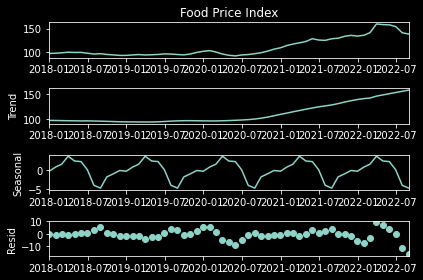

In [23]:
model.plot();

In [18]:
idx = seasonal.index
vals = seasonal.values

In [19]:
seasonal = pd.DataFrame([[idx[i],vals[i]]for i in range(len(idx))],columns=['Date','Seasonality'])

In [20]:
seasonal['Month'] = seasonal.Date.apply(lambda x: x.month)

In [22]:
seasonal['SeasonalAvg'] = seasonal.Date.apply(lambda x: averages[x.year] if x.year in list(averages.keys()) else 0)

In [23]:
seasonal

,Date,Seasonality,Month,SeasonalAvg
0,2017-12-31,-0.201825,12,0
1,2018-01-31,0.941903,1,0
2,2018-02-28,1.690781,2,0
3,2018-03-31,3.859341,3,0
4,2018-04-30,2.561307,4,0
5,2018-05-31,2.397274,5,0
6,2018-06-30,0.178308,6,0
7,2018-07-31,-4.012134,7,0
8,2018-08-31,-4.766804,8,0
9,2018-09-30,-1.737232,9,0


In [36]:
prev_seasonal = seasonal.set_index(seasonal.Date)[f'{current_year-1}-01-01':f'{current_year-1}-12-31']

In [37]:
# remaining_months

In [47]:
last_month = _df.iloc[-1].name.month
last_year = _df.iloc[-1].name.year

In [46]:
i = 9

In [59]:
seasonal.Date.apply(lambda x: x.year)==last_year

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
Name: Date, dtype: bool

In [60]:
(seasonal.Date.lambda(x:x.year)==last_year) & (seasonal.Date.lambda(x:x.month)==last_month)

SyntaxError: invalid syntax (726397690.py, line 1)

In [ ]:
departure_point = _df.iloc[-1]['Food Price Index']
remaining_points = []
for i in range(last_month+1,13):
    
    curr_point = departure_point
    remaining_points.append()

In [26]:
year_seasonal = model.seasonal['2021-01-01':'2021-12-31']

In [27]:
year_seasonal

Date
2021-01-31    0.941903
2021-02-28    1.690781
2021-03-31    3.859341
2021-04-30    2.561307
2021-05-31    2.397274
2021-06-30    0.178308
2021-07-31   -4.012134
2021-08-31   -4.766804
2021-09-30   -1.737232
2021-10-31   -0.905900
2021-11-30   -0.005020
2021-12-31   -0.201825
Freq: M, Name: seasonal, dtype: float64

In [60]:
starting = _df.loc['2021-12-01'].iloc[0]

monthly_pricing = []
previous_month = starting
for i in year_seasonal:
    current_month = previous_month+i
    monthly_pricing.append(current_month)
    previous_month = current_month

In [64]:
_df

,Food Price Index
Date,
2018-01-01,96.802947
2018-02-01,97.875309
2018-03-02,99.042066
2018-04-02,98.557992
2018-05-03,98.672772
2018-06-01,96.950992
2018-07-02,95.135179
2018-08-01,95.969576
2018-09-01,94.239430


In [63]:
sum(monthly_pricing)/len(monthly_pricing)

138.44161656266917

In [19]:
year_seasonal.iloc[1]

1.773211362633734

In [20]:
year_seasonal.mean()

2.7755575615628914e-17

In [13]:
seasonal = model.seasonal

In [21]:
year_value = 134

In [24]:
abs(year_value*year_seasonal).mean()

269.3247629500764

In [1]:
_df.iloc[0]['Food Price Index']

NameError: name '_df' is not defined

In [ ]:
seasonal_years = {i:[] for i in range(1,13)}
for i in range(len(seasonal)):
    x = _df.iloc[i] 
    seasonal_years[x.name.month].append(seasonal.iloc[i])

In [ ]:
seasonal_years

In [49]:
seasonal.index[0]

Timestamp('2018-01-01 00:00:00')